# Dataframes

A lot of the analyses you'll be asked to perform will be based on a dataframe, i.e., a spreadsheet where 
data is structured in rows and columns. 

There are other ways to store, access, and exploit data (we'll discuss Structured Data in the next Lesson), but 
usually even that data is at one point converted into a dataframe, over which you'll perform (and record) your analyses.

The main and most popular module in Python for dataframes is called `pandas`, and frequently abbreviated 
as `pd`. Think of pandas in this context as an equivalent of Microsoft Excel - except 
infinitely more flexible (though you can do much more with Excel if you learn VBA, the language powering it).

We'll introduce you very softly to pandas today, keeping most of the heavy work for another lesson - but you'll need 
the basics to properly follow through the lessons on Scraping, for instance.

This course comes pre-loaded with a `.csv` file about decisions from the Conseil D'Etat in November 2021. 
We'll perform a number of operations over it to showcase `pandas`'s abilities.

You first load the file with pandas, which makes it easy for you for a dedicated `read_csv` function (no need to use 
a reader/writer as we just saw before).

In [6]:
import os
import pandas as pd  # We import pandas
from matplotlib.pyplot import plot  # We also import a module to create graphs and plots
import regex as re

os.chdir("./Data/CSVs")  # We move to the folder where the file is located

df = pd.read_csv("Conseil Etat Novembre 2011.csv", header="infer")  # We load it 
df = df.fillna("")  # It is common to fill the "empty" cells (which are cast as "NaN", or "Not a Number", 
#replacing them with an empty string instead (""). This is to facilitate comparisons (as you can't compare a string to a NaN)

Then we can do a bit of data investigation, see what's the most interesting column or data, etc. One first useful tool is the `.value_count()` method, which allow you to see the rough distribution of a variable. 

Index(['Numero_Dossier', 'Date_Lecture', 'Date_Audience', 'Avocat_Requerant',
       'Type_Decision', 'Type_Recours', 'Formation_Jugement'],
      dtype='object')
0      Contentieux des pensions
1              Excès de pouvoir
2             Plein contentieux
3             Plein contentieux
4             Plein contentieux
                 ...           
675            Excès de pouvoir
676           Plein contentieux
677           Plein contentieux
678            Excès de pouvoir
679            Excès de pouvoir
Name: Type_Recours, Length: 680, dtype: object


<AxesSubplot:>

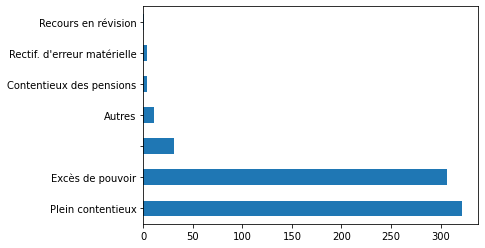

In [7]:
df.head(5)
print(df.columns)
print(df["Type_Recours"] ) # You access a particular column by indexing it this way (we'll see further indexing in a few weeks)
df["Type_Recours"].unique()  # Functions such as Unique renders a list of all possible values in a given column
df["Type_Recours"].value_counts()  # One of the most useful functions returns a count of all values

df["Type_Recours"].value_counts().plot(kind='barh')  # And now we can plot it with a bar chart

Like lists and dictionaries, a pandas object is a collection of data, and you may want to index it to find a particular data point. The methods are a bit different however.

To get a single value, you can use the method `.at`, which takes two arguments: the row number, and the column index.

In [8]:
print(df.at[0, "Type_Recours"])  # This returns the value of the column "Type_Recours" for the first line of the df
print(df.at[10, "Avocat_Requerant"]) # The value for the column "Avocat_Requerant" for the 10th line

Contentieux des pensions
SCP PIWNICA, MOLINIE


More commonly, Pandas objects have a method `.loc`, which returns a slice of the dataframe based on a condition (which should be True), or `.at` to get a particular cell if you know its index.

In [9]:
df.loc[df.Formation_Jugement == "Juge des référés"]  # Filtering the dataframe to focus on all rows where the formation of 
# judgment is the "Juge des Référées

,Numero_Dossier,Date_Lecture,Date_Audience,Avocat_Requerant,Type_Decision,Type_Recours,Formation_Jugement
442,456924,22/11/2021,21/10/2021,"SCP SEVAUX, MATHONNET",Décision,Excès de pouvoir,Juge des référés
443,457053,24/11/2021,19/10/2021,,Décision,Excès de pouvoir,Juge des référés
444,457346,02/11/2021,22/10/2021,SCP GUÉRIN - GOUGEON,Décision,Excès de pouvoir,Juge des référés
446,457399,16/11/2021,08/11/2021,"SCP OHL, VEXLIARD",Décision,Excès de pouvoir,Juge des référés
448,457441,08/11/2021,25/10/2021,"SCP FABIANI, LUC-THALER, PINATEL",Décision,Excès de pouvoir,Juge des référés
450,457559,02/11/2021,26/10/2021,"SCP GADIOU, CHEVALLIER",Décision,Excès de pouvoir,Juge des référés
452,457687,16/11/2021,04/11/2021,"SCP GATINEAU, FATTACCINI, REBEYROL",Décision,Excès de pouvoir,Juge des référés
453,457726,19/11/2021,16/11/2021,,Décision,Excès de pouvoir,Juge des référés
454,457743,16/11/2021,12/11/2021,BOURREL,Décision,Plein contentieux,Juge des référés
457,457883,04/11/2021,28/10/2021,CHARLOT CHRISTINE,Décision,Plein contentieux,Juge des référés


Again like with a list, you may want to loop over a dataframe to work on every data point one after another. Iterating over a dataframe is generally done with the help of the method `iterrows` - which provides you with two elements (index, and a row that can be indexed with column names).

In [11]:
for index, row in df[:15].iterrows():  # We limit the loop to the first 15 rows
    print(index, row["Formation_Jugement"], row["Avocat_Requerant"])

0  4ème chambre jugeant seule SCP BENABENT
1 10ème chambre jugeant seule CABINET COLIN - STOCLET
2 10ème chambre jugeant seule SCP BARADUC, DUHAMEL, RAMEIX
3  9ème chambre jugeant seule DOCHLER GATE EMMA
4 4ème et 1ère chambres réunies SCP RICHARD
5 4ème et 1ère chambres réunies SCP GOUZ-FITOUSSI
6  9ème chambre jugeant seule SCP BOUTET-HOURDEAUX
7 4ème et 1ère chambres réunies THOUVENIN, COUDRAY, GREVY
8 9ème et 10ème chambres réunies 
9 9ème et 10ème chambres réunies 
10 4ème et 1ère chambres réunies SCP PIWNICA, MOLINIE
11 9ème et 10ème chambres réunies CABINET BRIARD
12 4ème et 1ère chambres réunies SCP CELICE, TEXIDOR, PERIER
13 10ème chambre jugeant seule FITZJEAN O COBHTHAIGH
14  4ème chambre jugeant seule SCP LYON-CAEN, THIRIEZ


Keeping track of the index is very useful, if you want to change the value of a column, or populate a new column, as in the example below.

In [13]:
df["Empty_Col"] = "" # Creating new column with empty text
df["New_Col"] = df["Formation_Jugement"].str.replace("jugeant seule", "").str.strip()  # creating new column with data from 
# another column, except we changed all strings (str) with empty text, and then stripping

df["Mixed"] = False # Another new column, with only False datapoints for now
for index, row in df.iterrows(): # We loop over the dataframe
    if re.search("r.unies", row["Formation_Jugement"], re.I):  # We check that the formation is made of chambres réunies
        df.at[index, "Mixed"] = True  # If this is the case, we reassign the column Mixed at the relevant index with True

df.Mixed.value_counts()

False    603
True      77
Name: Mixed, dtype: int64

Finally (for now), note that you can always put your dataframe in the clipboard (i.e., a CTRL+C) so as to paste it (with CTRL+V) in a normal excel or csv file.

In [ ]:
df.to_clipboard(index=False)